

# Investigate a Dataset - [ No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

### Dataset Description 
A number of characteristics about the patient are included in each row.

- ‘ScheduledDay’ tells us on what day the patient set up their appointment.

- ‘Neighborhood’ indicates the location of the hospital.

- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.



### Question(s) for Analysis
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:
# Import libraries necessary for project.

import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp
import seaborn as sns

%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


### General Properties

in this section we will load our data to see its details.


In [2]:
# Loading the data and printing out a few lines. 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#calculating our dataset rows and columns.
df.shape

(110527, 14)

Data containing **110527** rows and **14** columns

In [4]:
#finding out is there any missing values.
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Notice that there are no missing values.

In [13]:
#showing data info to check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


In [5]:
#Showing the detailed info.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


  Notice that the average age of the patients is **37**, and the minimum age is **-1**  but it can be a mistake and most ages ranging between age **18** and **37**.



### Data Cleaning 

In [15]:
#Here I will drop some columns unnecessary for my analysis
df.drop(['PatientId' , 'AppointmentID' , 'Neighbourhood', 'Scholarship', 'Hipertension', 'AppointmentDay' , 'ScheduledDay'], axis=1, inplace=True)

Remove the unnecessary columns to handling the data more easly.

In [12]:
#Loading the data.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Show,Not_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,True,False
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,True,False
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,True,False
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,True,False
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,True,False


In [17]:
#Now I fix the negative age by replacing the mean.

Avg_Age = df['Age'].mean()
df[df['Age'] <=0] = Avg_Age

df.describe()

,Age,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,38.276780,1.259761,1.218296,1.210135,1.500806
std,22.104561,6.522499,6.527195,6.528421,6.489885
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000
50%,37.088874,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,37.088874,37.088874,37.088874,37.088874


Noticing that the negative values removed.

In [18]:
#Loading the data.
df.head()

,Gender,Age,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62.0,0.0,0.0,0.0,0.0,No
1,M,56.0,0.0,0.0,0.0,0.0,No
2,F,62.0,0.0,0.0,0.0,0.0,No
3,F,8.0,0.0,0.0,0.0,0.0,No
4,F,56.0,1.0,0.0,0.0,0.0,No


In [6]:
#parting patients into two categories of showing or not showing
Show = df['No-show'] == 'No'
Not_show = df['No-show'] == 'Yes'
df['Show'] = Show
df['Not_show'] = Not_show
df[Show].count(),df[Not_show].count()

(PatientId         88208
 AppointmentID     88208
 Gender            88208
 ScheduledDay      88208
 AppointmentDay    88208
 Age               88208
 Neighbourhood     88208
 Scholarship       88208
 Hipertension      88208
 Diabetes          88208
 Alcoholism        88208
 Handcap           88208
 SMS_received      88208
 No-show           88208
 Show              88208
 Not_show          88208
 dtype: int64,
 PatientId         22319
 AppointmentID     22319
 Gender            22319
 ScheduledDay      22319
 AppointmentDay    22319
 Age               22319
 Neighbourhood     22319
 Scholarship       22319
 Hipertension      22319
 Diabetes          22319
 Alcoholism        22319
 Handcap           22319
 SMS_received      22319
 No-show           22319
 Show              22319
 Not_show          22319
 dtype: int64)

No. of showing patients is **88208** more than **22319** of non showing patients.

<a id='eda'></a>
## Exploratory Data Analysis




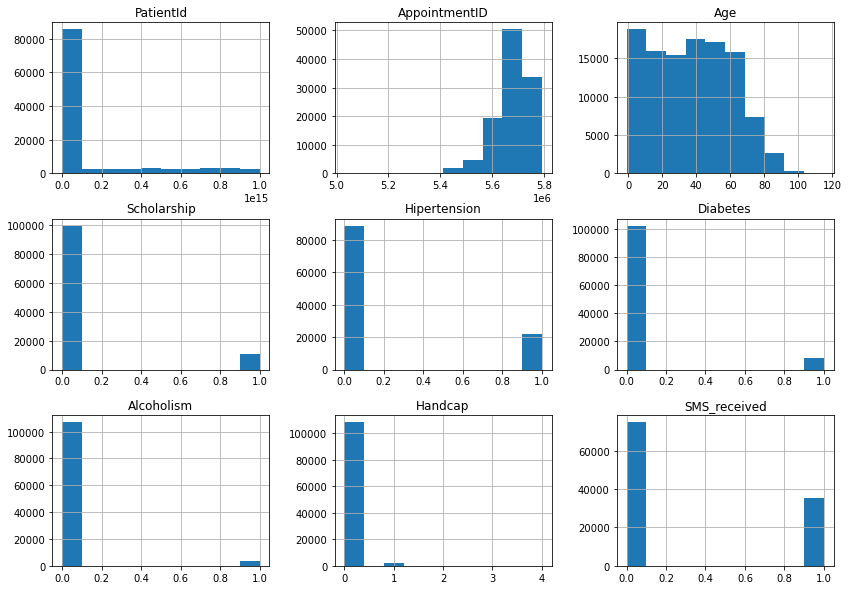

In [7]:
#showing a histogram of our data.

df.hist(figsize= (14,10));

The histogram above describe the relation between showing in the appointments and other affects and we can see that age affect the most.

### Q1: How many patients show and not show in the appointments?

Patients Show: 
77.18204601590561

Patients Not Show: 
22.817953984094384


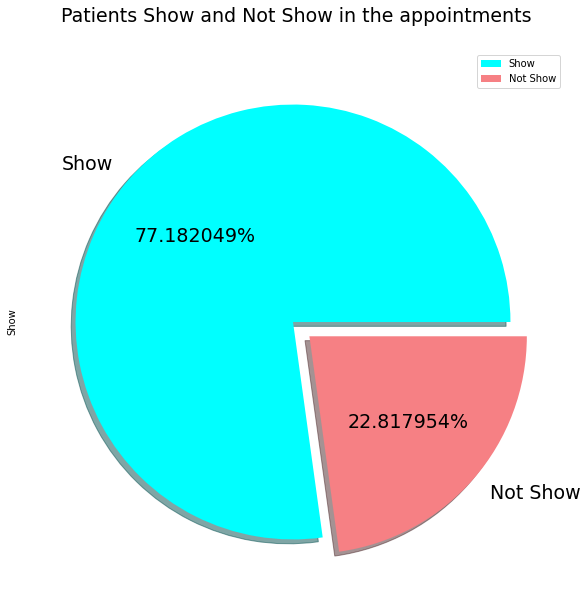

In [30]:
# Exploring using the Pie Chart 

Patient_show = df['Show'].value_counts()

def Pshow():
    print(Patient_show[1] / Patient_show.sum() * 100)

def PNotshow():
    print(Patient_show[0] / Patient_show.sum() * 100)

print('Patients Show: ')
Pshow()
print('\nPatients Not Show: ')
PNotshow()
labels =['Show','Not Show']
colors = ['#00FFFF','#f68084']
explode = (0, 0.1)
chart = Patient_show.plot.pie(figsize=(10,10), autopct='%2f%%', fontsize = 19,colors=colors,explode=explode,labels=labels, shadow=True);
chart.set_title(' Patients Show and Not Show in the appointments\n', fontsize = 19);
mtp.legend()

Notice that in the figure above the patients who show (**%80**) in the appointments are more than the patients who did not show (**%20**).

### Q2: Does the show affected by the patients age ?

Text(0, 0.5, 'Patients')

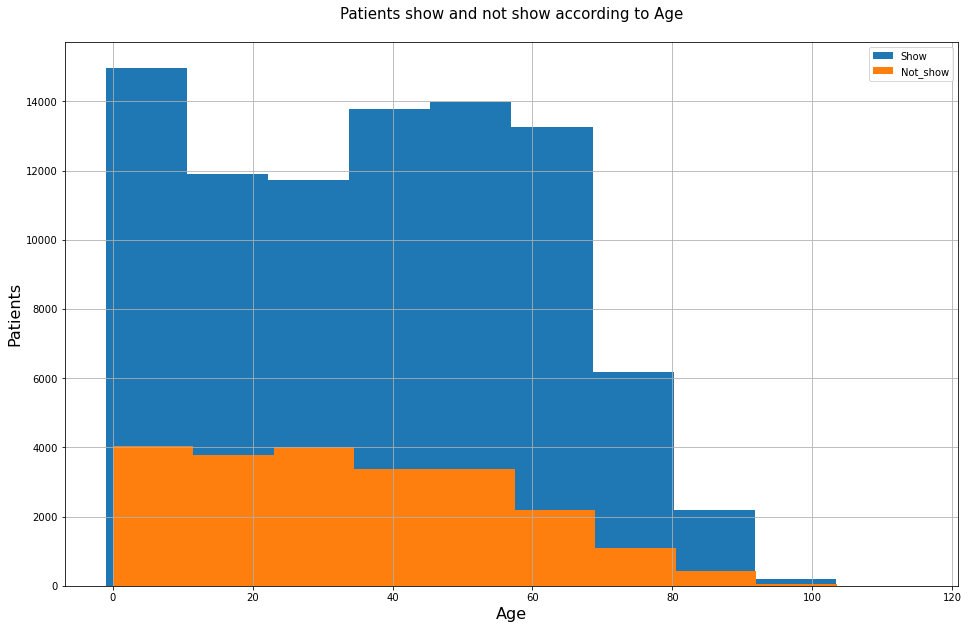

In [9]:
#Making a histogram describe the relation between age and showing in appointments.

mtp.figure(figsize=[16,10])

df.Age[Show].hist(alpha=1,label='Show')
df.Age[Not_show].hist(alpha=1,label='Not_show')
mtp.legend()
mtp.title('Patients show and not show according to Age\n',fontsize=15)
mtp.xlabel('Age',fontsize=16)
mtp.ylabel('Patients',fontsize=16)

As we can see here in the figure above, patients with higher ages tend to not show.

Text(0, 0.5, 'Patients')

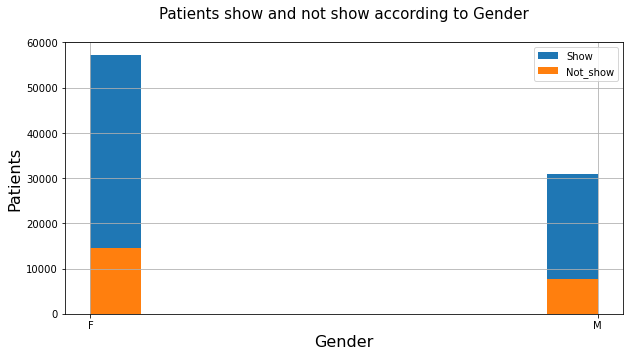

In [11]:
#Making a histogram describe the relation between Gender and showing in appointments.

mtp.figure(figsize=[10,5])

df.Gender[Show].hist(alpha=1,label='Show')
df.Gender[Not_show].hist(alpha=1,label='Not_show')
mtp.legend()
mtp.title('Patients show and not show according to Gender\n',fontsize=15)
mtp.xlabel('Gender',fontsize=16)
mtp.ylabel('Patients',fontsize=16)


As we can see here in the figure above, Male patients show in appointments more than female.

<a id='conclusions'></a>
## Conclusions



- The analysis shows that about 80% of patients show in the appointments,whereas 20% of them did not show.

- The analysis shows that male patients show in the appointments are **2** times more than female patients.

## Limitations:

- I could not understand how can send sms can affect the show and not show of patients in appointments.

In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295